<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-necessary-packages" data-toc-modified-id="Import-necessary-packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import necessary packages</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import data</a></span><ul class="toc-item"><li><span><a href="#Resources" data-toc-modified-id="Resources-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Resources</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span></li></ul></div>

## Import necessary packages

In [1]:
import cv2
import os, sys
import matplotlib.pyplot as plt
import numpy as np
import random

import requests
import urllib.request
import time
from bs4 import BeautifulSoup

In [2]:
def reshape_img(img, size=(224,224), plot_compressed=True):
    """
    Reshape image.
    
    Note that default size for mobilenet and mobilenet2 model is 224x224,
    see https://keras.io/applications/#mobilenet
    """
    s = size[0]
    
    #Creating a dark square with NUMPY  
    f = np.zeros((size[0], size[1], 3), np.uint8)

    #Getting the bigger side of the image
    if img.shape[0] > img.shape[1]:
        new_width = (s * img.shape[1]) // img.shape[0]
        img = cv2.resize(img, (new_width, s))
    else:
        new_height = (s * img.shape[0]) // img.shape[1]
        img = cv2.resize(img, (s, new_height))

    #Getting the centering position
    ax, ay = (s - img.shape[1]) // 2, (s - img.shape[0]) // 2

    #Pasting the 'image' in a centering position
    f[ay:img.shape[0]+ay, ax:ax+img.shape[1]] = img
    
    if plot_compressed:
        plt.imshow(f)
        
    return f

## Import data

In [4]:
img_folder = "Fiskebilder/Ferskvann/"

fishes = os.listdir(img_folder)
images = []
for fish in fishes:
    temp_imgs = os.listdir(img_folder + fish + '/')
    temp_imgs = [fish + '/' + s for s in temp_imgs]
    images.append(temp_imgs)
    
images = [item for sublist in images for item in sublist]

In [5]:
for img in images:
    #if img[:4] == 'Stei':
    temp_img = cv2.imread(img_folder + img)
    shap = temp_img.shape
    # Note that default size for mobilenet and mobilenet2 model is 224x224
    if shap[0] < 224 or shap[1] < 224:
        print("Image %s: (%i x %i)" % (img, temp_img.shape[0], temp_img.shape[1]))

### Resources
- https://web.archive.org/web/20090804165327/http://www.fiskipedia.no/artsoversikt.html
- https://www.klikk.no/produkthjemmesider/villmarksliv/sportsfiskerekordene-i-saltvann-2842542
- https://www.klikk.no/produkthjemmesider/villmarksliv/ferskvann-2762273

In [16]:
# Scrap pages for sport fishing records in Norway
url_salt = "https://www.klikk.no/produkthjemmesider/villmarksliv/sportsfiskerekordene-i-saltvann-2842542"
url_fresh = "https://www.klikk.no/produkthjemmesider/villmarksliv/ferskvann-2762273"

response_salt = requests.get(url_salt)
response_fresh = requests.get(url_fresh)
print(response_fresh, response_salt)

soup_salt = BeautifulSoup(response_salt.text, "html.parser")
soup_fresh = BeautifulSoup(response_fresh.text, "html.parser")

<Response [200]> <Response [200]>


In [21]:
p_fresh = soup_fresh.find_all('p')
p_fresh

[<p style="margin-bottom:10px">
 <span>Ansvarlig redaktør:</span><br/>
 <a href="/cdn-cgi/l/email-protection#e1848d88928083849589cf8d948f85cc808f85849392848fa184868c8e8f95cf828e8c">Elisabeth Lund-Andersen</a>
 </p>,
 <p>Utgiver: <span itemprop="name"><a href="http://www.egmont.com/no/egmont/om-egmont-i-norge/">Egmont Publishing AS</a></span></p>,
 <p></p>,
 <p>Adresse: Nydalsveien 12, 0441 Oslo</p>,
 <p>Telefon sentralbord: 22 77 20 00</p>,
 <p><a href="http://www.egmontpublishing.no/Kontakt1/Kundeservice/">Kundeservice</a></p>,
 <p style="margin-bottom:10px"><a href="http://www.klikk.no">Klikk.no</a> arbeider etter Vær varsom-plakatens retningslinjer for god presseskikk</p>,
 <p><a href="https://personvern.egmont.no/">Personvern og cookies</a>
 </p>,
 <p><strong>Les også: <a href="http://www.klikk.no/produkthjemmesider/villmarksliv/article291110.ece">Regler for registrering av norske sportsfiskerekorder</a> </strong></p>,
 <p><u><strong>Fiskeslag - Vekt i kg - Fisket av - Fangststed -

## EDA

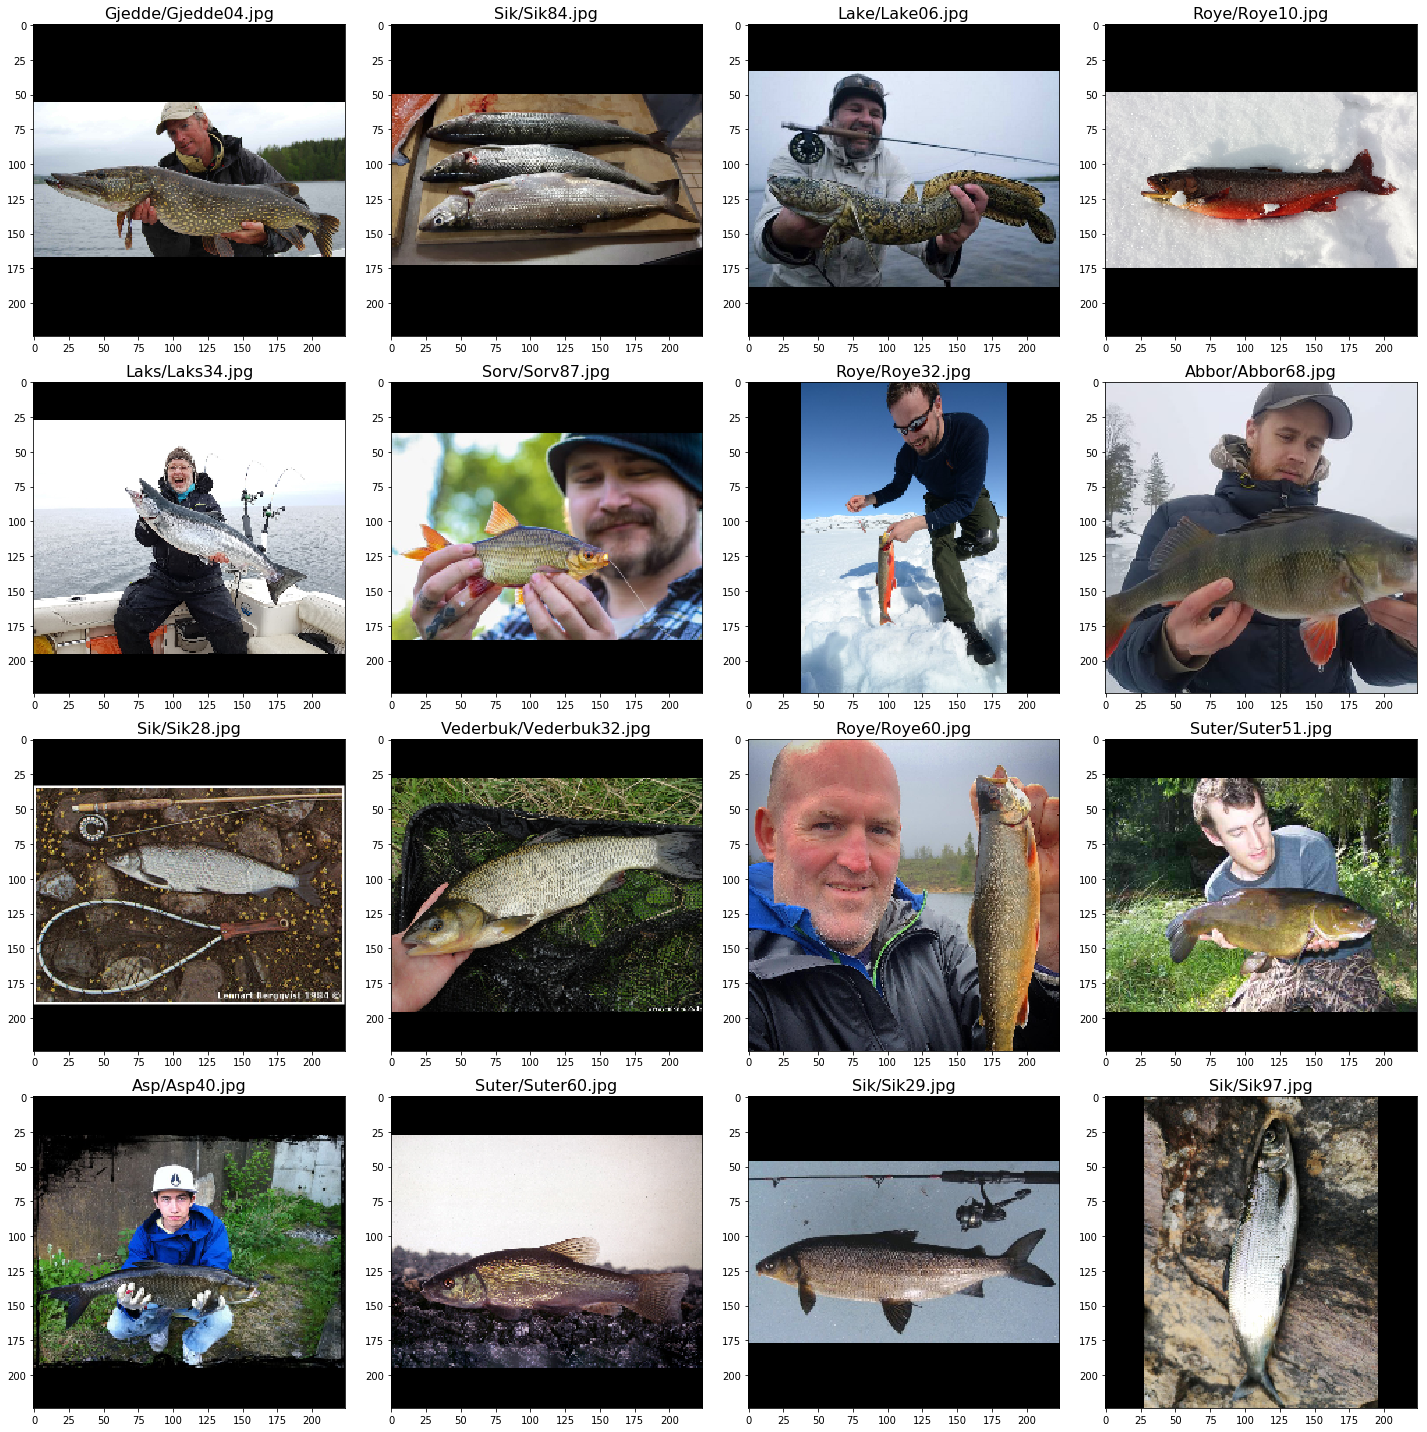

In [4]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
for i in range(4): 
    for j in range(4):
        img_tit = images[random.randint(0,len(images))]
        temp_img = cv2.imread(img_folder + img_tit, cv2.IMREAD_UNCHANGED)
        temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)    
        temp_img = reshape_img(temp_img, plot_compressed=False)
        ax[i][j].imshow(temp_img)
        ax[i][j].set_title(img_tit, fontsize=16)
    
plt.tight_layout()
plt.show()